# Video "What is TensorFlow"

In [1]:
%config IPCompleter.greedy=True

In [2]:
import tensorflow as tf
import numpy as np
print(tf.__version__)

1.12.0


In [3]:
tf.reset_default_graph()
a = tf.placeholder(np.float32, (2, 2))
b = tf.Variable(tf.ones((2, 2)))
c = a @ b

In [4]:
print(c)

Tensor("matmul:0", shape=(2, 2), dtype=float32)


In [5]:
s = tf.InteractiveSession()

In [6]:
s.run(tf.global_variables_initializer())
s.run(c, feed_dict={a: np.ones((2, 2))})

array([[2., 2.],
       [2., 2.]], dtype=float32)

In [7]:
s.close()

# Video "Our first model in TensorFlow"

### Simple optimization (with simple prints)

In [8]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32, trainable=True)
f = x ** 2

In [9]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f, var_list=[x])

In [10]:
tf.trainable_variables()

[<tf.Variable 'x:0' shape=() dtype=float32_ref>]

In [11]:
with tf.Session() as s:  # in this way session will be closed automatically
    s.run(tf.global_variables_initializer())
    for i in range(10):
        _, curr_x, curr_f = s.run([step, x, f])
        print(curr_x, curr_f)

-0.46788245 0.3420531
-0.37430596 0.21891399
-0.29944476 0.14010495
-0.2395558 0.089667164
-0.19164464 0.057386983
-0.15331571 0.036727667
-0.12265257 0.023505706
-0.09812205 0.015043653
-0.07849764 0.009627937
-0.06279811 0.0061618797


### Simple optimization (with tf.Print)

In [12]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32)
f = x ** 2
f = tf.Print(f, [x, f], "x, f:")

Instructions for updating:
Use tf.print instead of tf.Print. Note that tf.print returns a no-output operator that directly prints the output. Outside of defuns or eager mode, this operator will not be executed unless it is directly specified in session.run or used as a control dependency for other operators. This is only a concern in graph mode. Below is an example of how to ensure tf.print executes in graph mode:
```python
    sess = tf.Session()
    with sess.as_default():
        tensor = tf.range(10)
        print_op = tf.print(tensor)
        with tf.control_dependencies([print_op]):
          out = tf.add(tensor, tensor)
        sess.run(out)
    ```
Additionally, to use tf.print in python 2.7, users must make sure to import
the following:

  `from __future__ import print_function`



In [13]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f)

In [14]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(10):
        s.run([step, f])

In [15]:
# Prints to jupyter server stdout (not available in Coursera Notebooks):
# 2018-07-21 18:01:27.308270: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-1.0670249][1.1385423]
# 2018-07-21 18:01:27.308809: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.85361993][0.72866696]
# 2018-07-21 18:01:27.309116: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.68289596][0.46634689]
# 2018-07-21 18:01:27.309388: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.54631674][0.29846197]
# 2018-07-21 18:01:27.309678: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.43705338][0.19101566]
# 2018-07-21 18:01:27.309889: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.34964269][0.12225001]
# 2018-07-21 18:01:27.310213: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.27971417][0.078240015]
# 2018-07-21 18:01:27.310475: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.22377133][0.050073609]
# 2018-07-21 18:01:27.310751: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.17901707][0.032047112]
# 2018-07-21 18:01:27.310963: I tensorflow/core/kernels/logging_ops.cc:79] x, f:[-0.14321366][0.020510152]

### Simple optimization (with TensorBoard logging)

In [16]:
tf.reset_default_graph()
x = tf.get_variable("x", shape=(), dtype=tf.float32)
f = x ** 2

In [17]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(f)

In [18]:
tf.summary.scalar('curr_x', x)
tf.summary.scalar('curr_f', f)
summaries = tf.summary.merge_all()

In [19]:
s = tf.InteractiveSession()
summary_writer = tf.summary.FileWriter("logs/1", s.graph)
s.run(tf.global_variables_initializer())
for i in range(10):
    _, curr_summaries = s.run([step, summaries])
    summary_writer.add_summary(curr_summaries, i)
    summary_writer.flush()

Run  `tensorboard --logdir=./logs` in bash

This is what you can see in your browser **(not available in Coursera Notebooks)**
<img src="images/TensorBoard.jpg" style="width:70%">

**If you're running on Google Colab you can still run TensorBoard!**

In [ ]:
# !!! RUN THIS CELL ONLY ON GOOGLE COLAB !!!
! wget https://raw.githubusercontent.com/hse-aml/intro-to-dl/master/setup_google_colab.py -O setup_google_colab.py
import setup_google_colab

# run tensorboard in background
import os
os.system("tensorboard --logdir=./logs --host 0.0.0.0 --port 6006 &")

# expose port and show the link
setup_google_colab.expose_port_on_colab(6006)

In [ ]:
s.close()

### Training a linear model

In [20]:
# generate model data
N = 1000
D = 3
x = np.random.random((N, D))
w = np.random.random((D, 1))
y = x @ w + np.random.randn(N, 1) * 0.20

print(x.shape, y.shape)
print(w.T)

(1000, 3) (1000, 1)
[[0.34826865 0.38918709 0.99278286]]


In [23]:
tf.reset_default_graph()

features = tf.placeholder(tf.float32, shape=(None, D))
target = tf.placeholder(tf.float32, shape=(None, 1))

weights = tf.get_variable("weights", shape=(D, 1), dtype=tf.float32)
predictions = features @ weights

loss = tf.reduce_mean((target - predictions) ** 2)

print(target.shape, predictions.shape, loss.shape)

(?, 1) (?, 1) ()


In [24]:
optimizer = tf.train.GradientDescentOptimizer(0.1)
step = optimizer.minimize(loss)

In [25]:
with tf.Session() as s:
    s.run(tf.global_variables_initializer())
    for i in range(300):
        _, curr_loss, curr_weights = s.run([step, loss, weights], 
                                           feed_dict={features: x, target: y})
        if i % 50 == 0:
            print(curr_loss)

0.17710099
0.04869413
0.041552756
0.04019466
0.039936356
0.039887235


In [26]:
# found weights
curr_weights.T

array([[0.32639995, 0.37925342, 1.0223017 ]], dtype=float32)

In [27]:
# true weights
w.T

array([[0.34826865, 0.38918709, 0.99278286]])

In [107]:
pred = x @ curr_weights

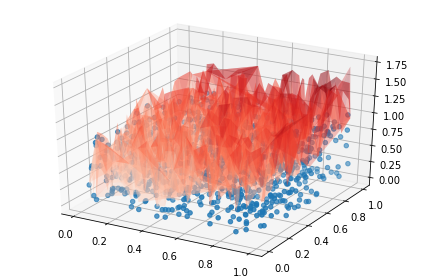

In [113]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x[:, 0], x[:, 1], x[:, 2])
ax.plot_trisurf(x[:, 0].tolist(), x[:, 1].tolist(), pred[:,0], alpha=0.3, cmap=plt.cm.Reds)
fig.tight_layout()